In [1]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt

# load data
xgb  =  pd.read_csv('res_xgboost_bo.csv')
glm  =  pd.read_csv('res_glmnet_bo.csv')

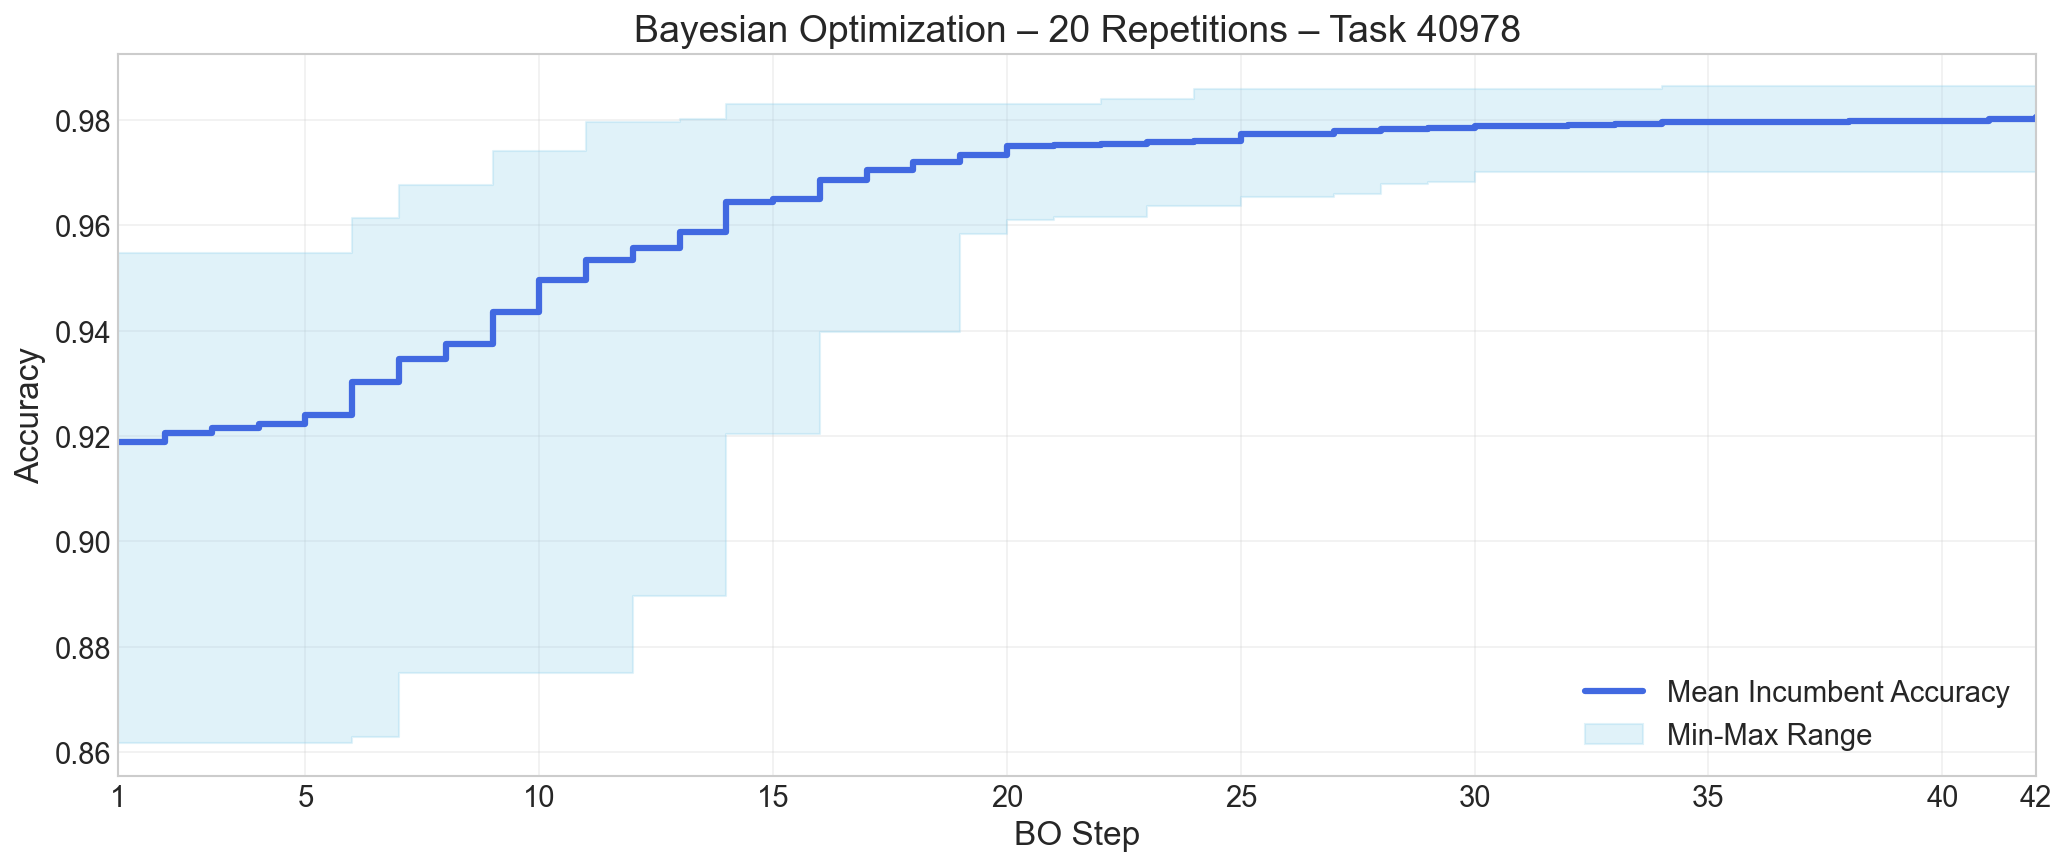

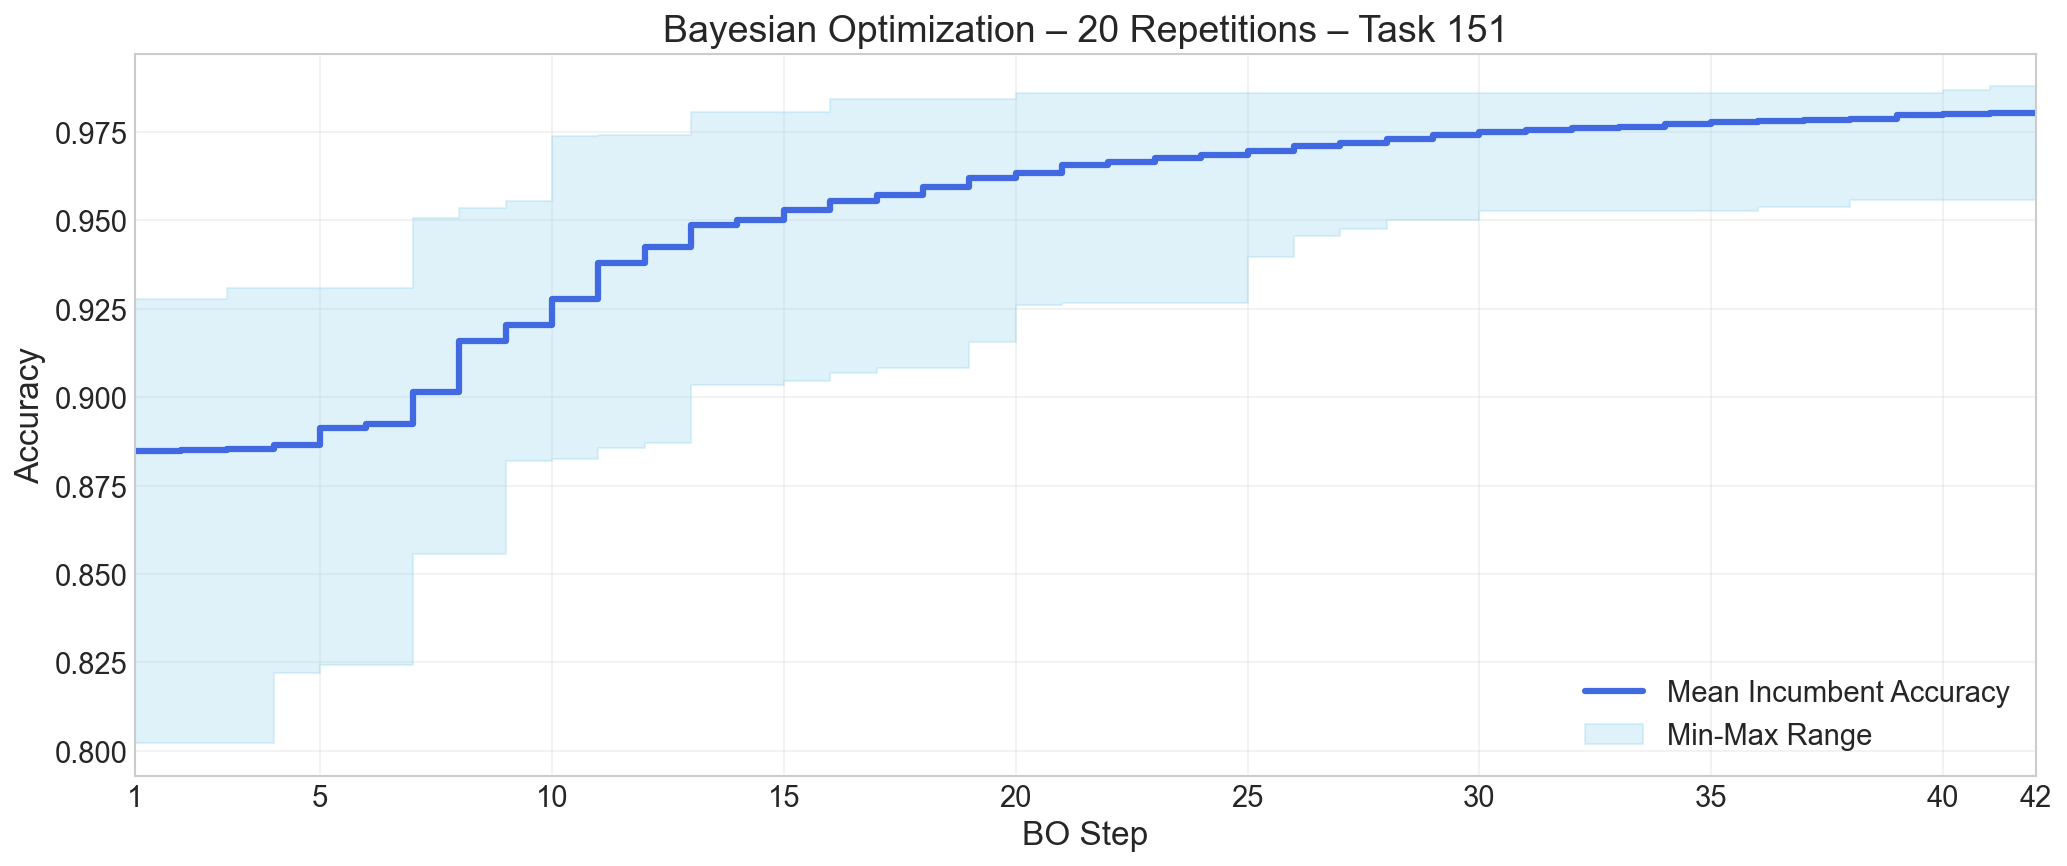

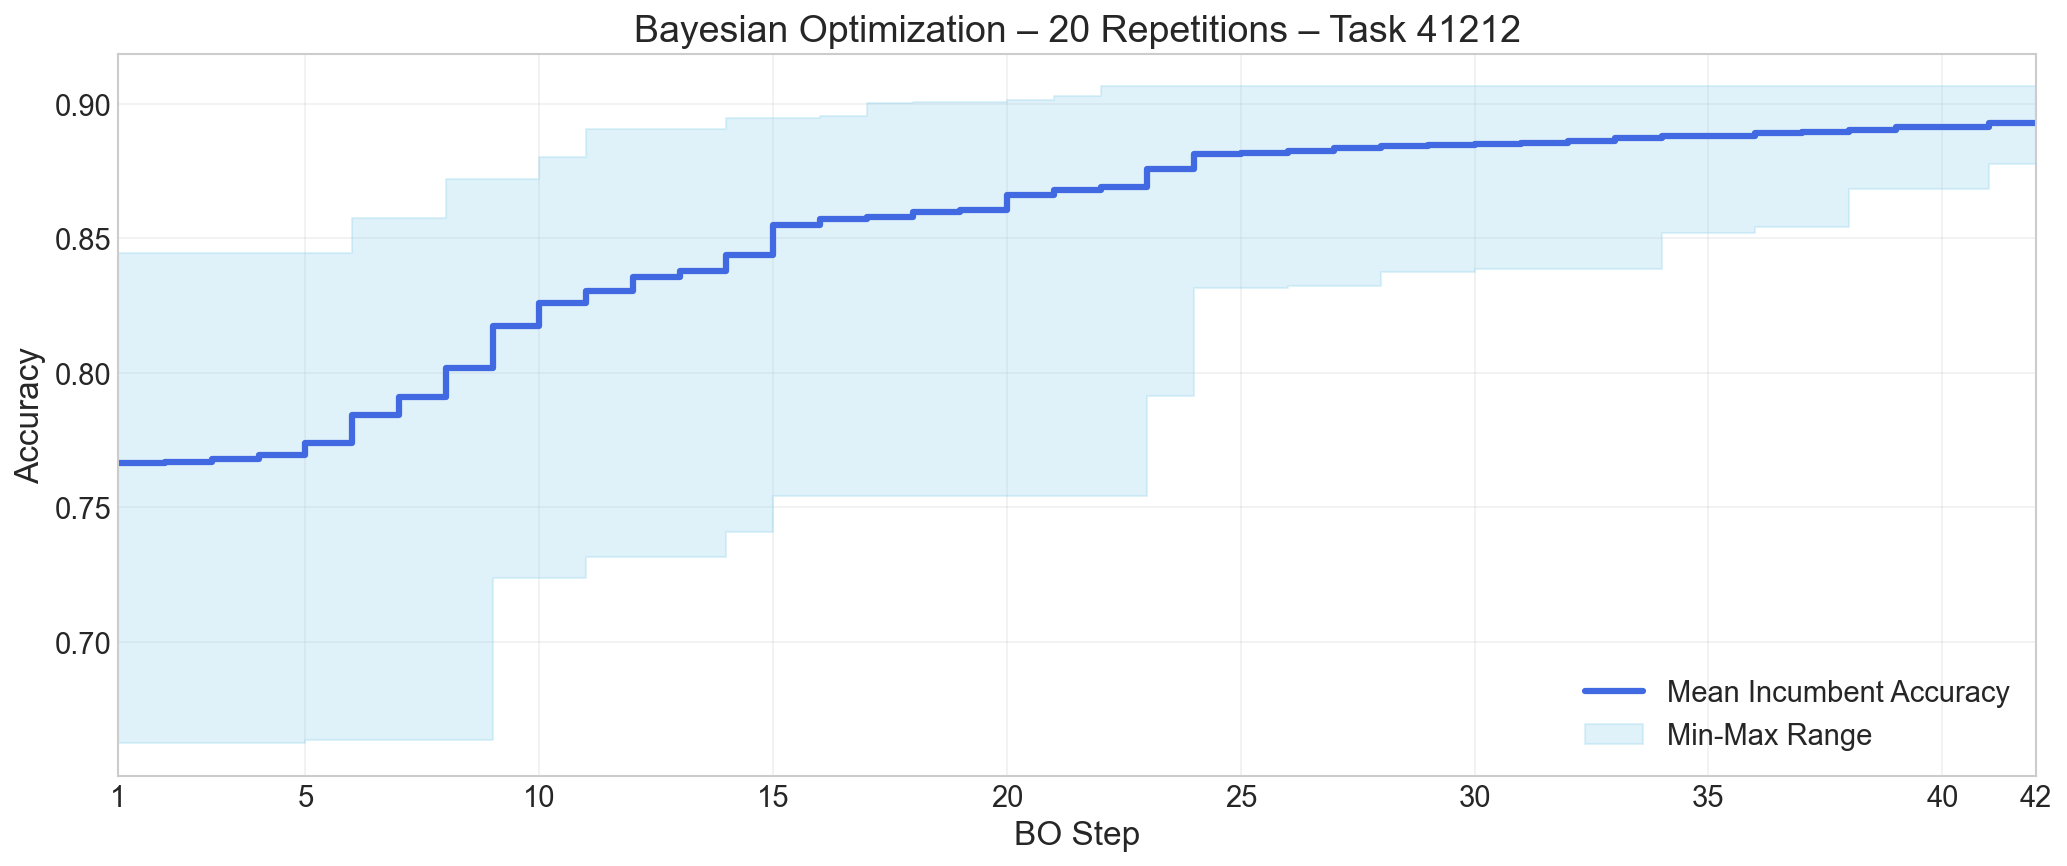

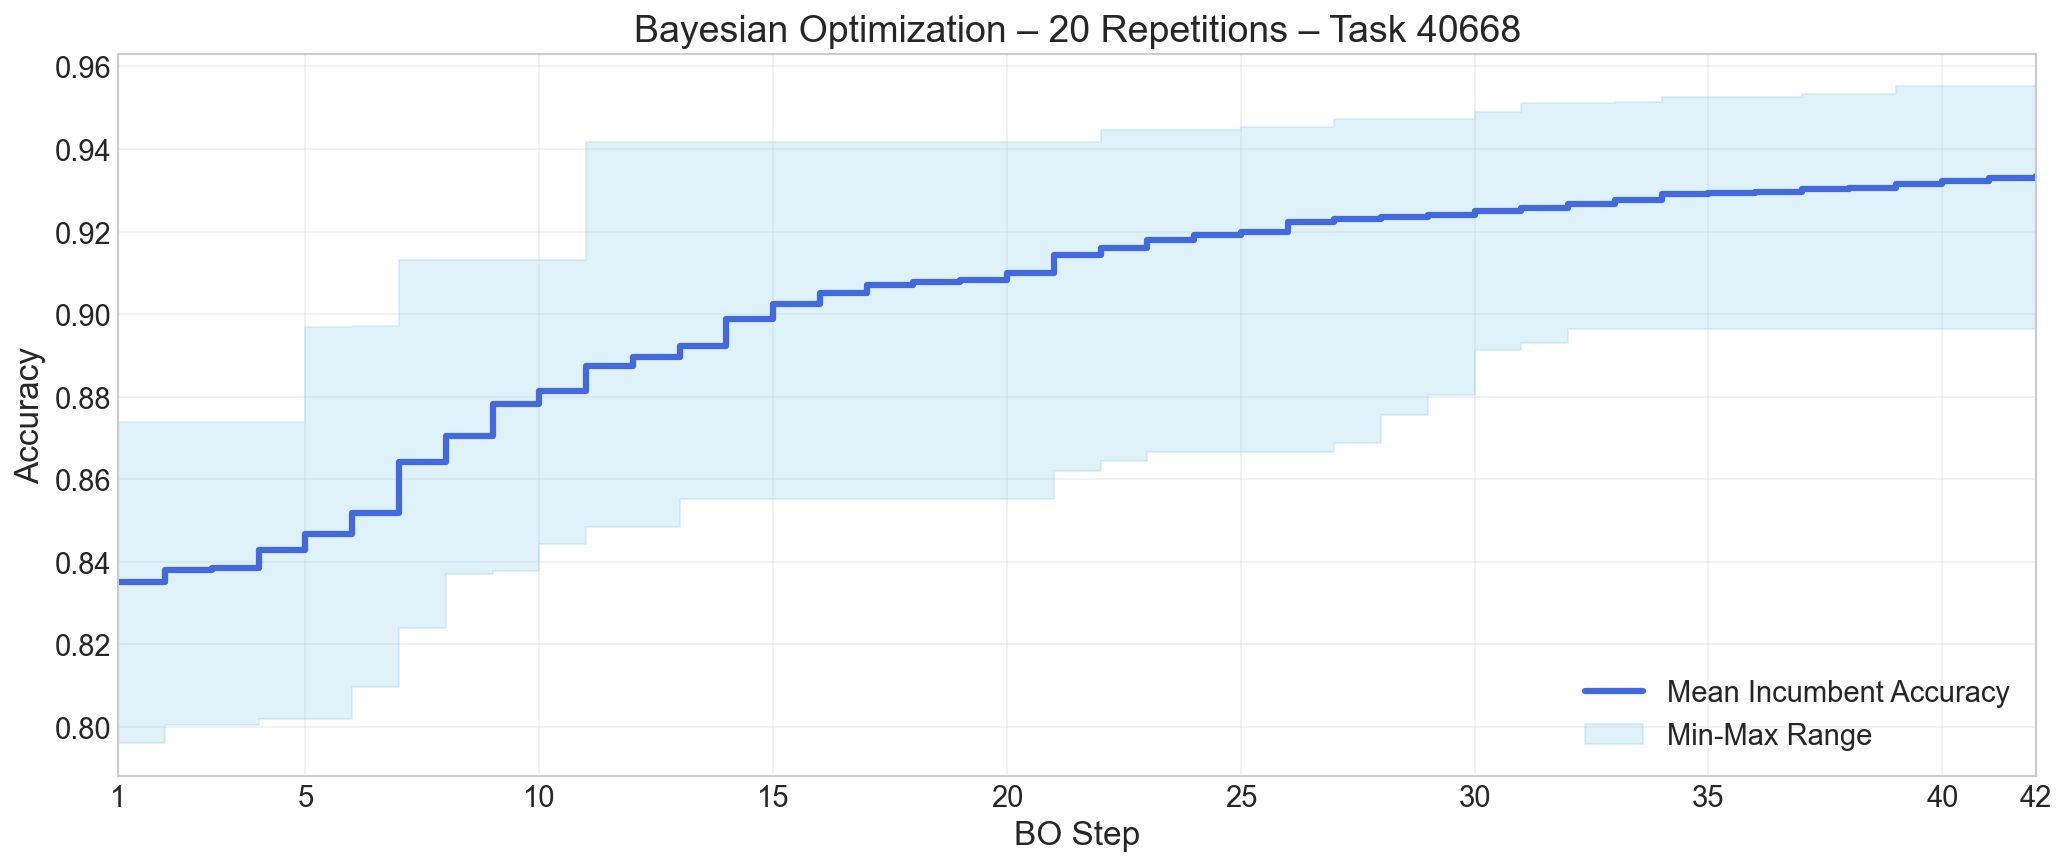

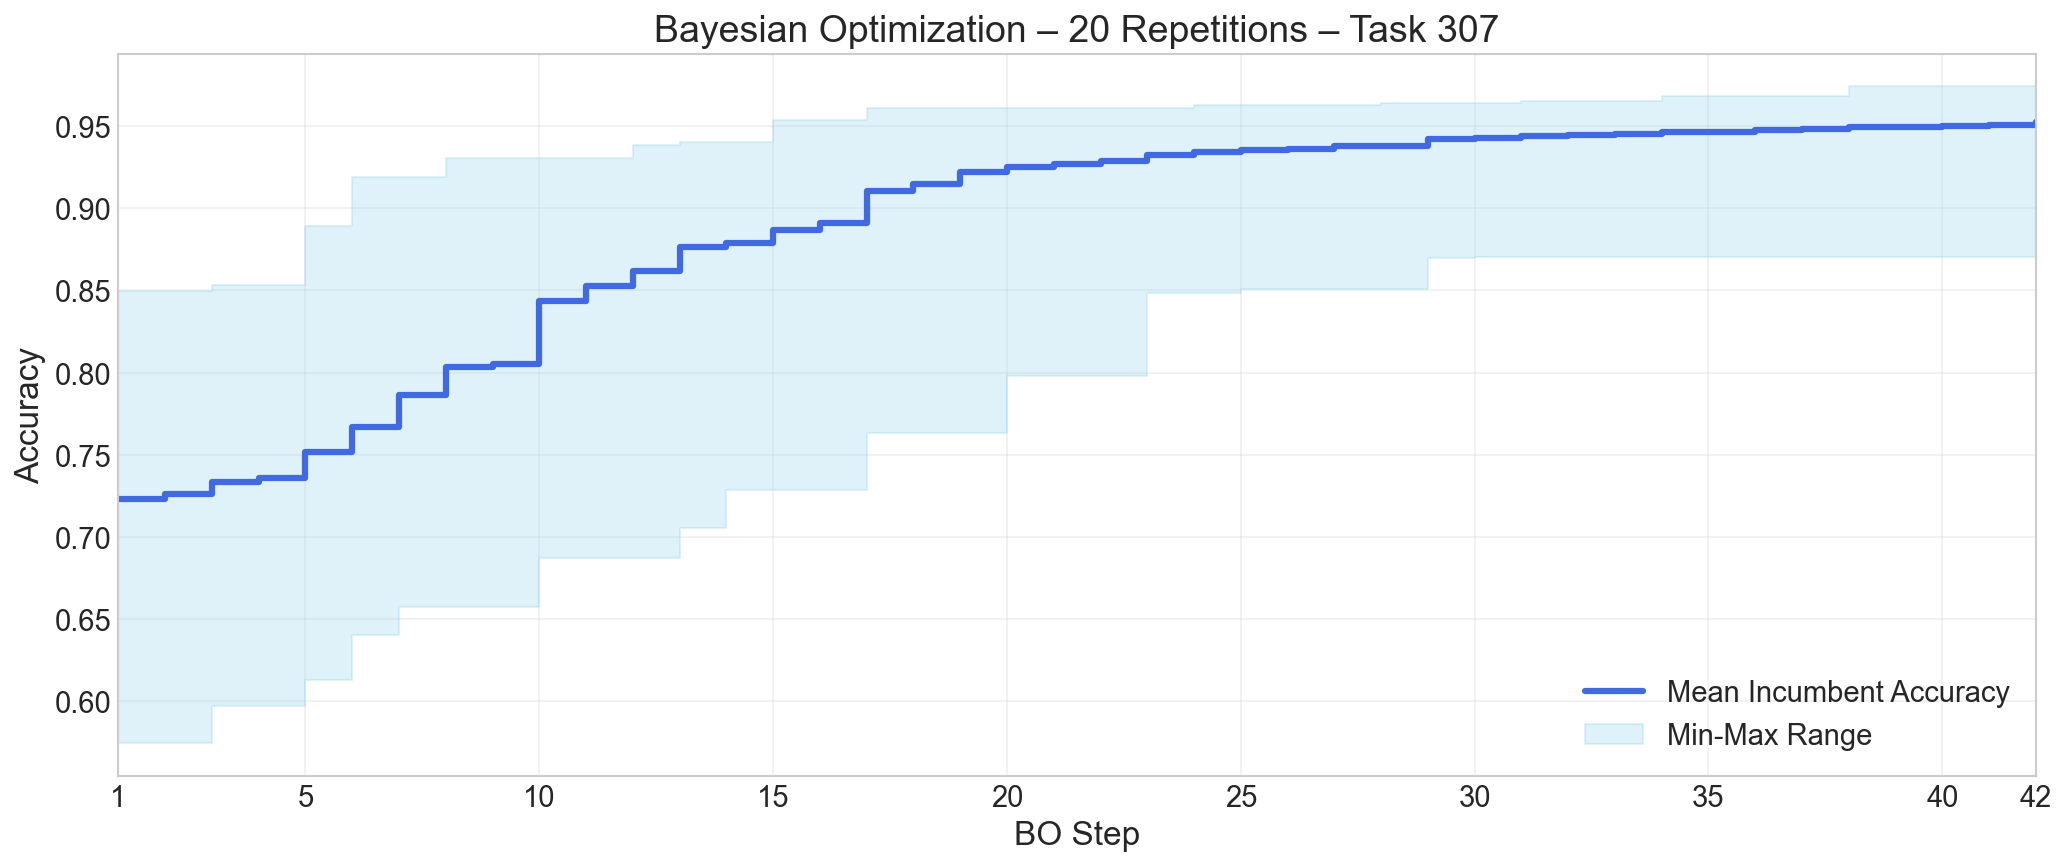

In [2]:
# plt config
plt.rcParams['figure.dpi'] = 150  
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 18,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14
})

# beatiful tasks
task_ids = [40978, 151, 41212, 40668, 307]

for task in task_ids:

    # filter & aggregate data
    viz_df = xgb.loc[(xgb['task_id'] == task) & (xgb['Inner_Iteration'] != 0)]
    agg_df = viz_df.groupby('Inner_Iteration')['Incumbant_Performance'].agg(['mean', 'min', 'max'])

    # data
    x = agg_df.index
    y = agg_df['mean']
    min_ = agg_df['min']
    max_ = agg_df['max']

    # plot
    plt.figure(figsize=(14, 6))
    plt.step(x, y, where='post', label='Mean Incumbent Accuracy',
             color='royalblue', linewidth=3)
    plt.fill_between(
        x, min_, max_,
        step='post', alpha=0.25,
        color='skyblue', label='Min-Max Range'
    )
    plt.xlim(1, x.max())
    plt.xticks([1] + list(range(5, x.max() + 1, 5)) + [42])

    # labels
    plt.xlabel('BO Step')
    plt.ylabel('Accuracy')
    plt.title(f'Bayesian Optimization – 20 Repetitions – Task {task}')
    plt.legend(loc='lower right')
    
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
